In [1]:
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
False


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UdeA-IoT/cacharreo/blob/main/5-TinyML_test/dic13/test.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/UdeA-IoT/cacharreo/tree/main/5-TinyML_test/dic13/test.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [6]:
import tensorflow.keras
from tensorflow.keras import models, layers, optimizers
import numpy as np

In [7]:
# Create some fake data
x = np.linspace(1, 2, 200)
y = (x * 8) + (np.random.randn(x.shape[0]) * 0.5)

In [8]:

# Examine data
print('x:', x)
print('y:', y)

x: [1.         1.00502513 1.01005025 1.01507538 1.0201005  1.02512563
 1.03015075 1.03517588 1.04020101 1.04522613 1.05025126 1.05527638
 1.06030151 1.06532663 1.07035176 1.07537688 1.08040201 1.08542714
 1.09045226 1.09547739 1.10050251 1.10552764 1.11055276 1.11557789
 1.12060302 1.12562814 1.13065327 1.13567839 1.14070352 1.14572864
 1.15075377 1.15577889 1.16080402 1.16582915 1.17085427 1.1758794
 1.18090452 1.18592965 1.19095477 1.1959799  1.20100503 1.20603015
 1.21105528 1.2160804  1.22110553 1.22613065 1.23115578 1.2361809
 1.24120603 1.24623116 1.25125628 1.25628141 1.26130653 1.26633166
 1.27135678 1.27638191 1.28140704 1.28643216 1.29145729 1.29648241
 1.30150754 1.30653266 1.31155779 1.31658291 1.32160804 1.32663317
 1.33165829 1.33668342 1.34170854 1.34673367 1.35175879 1.35678392
 1.36180905 1.36683417 1.3718593  1.37688442 1.38190955 1.38693467
 1.3919598  1.39698492 1.40201005 1.40703518 1.4120603  1.41708543
 1.42211055 1.42713568 1.4321608  1.43718593 1.44221106 1.447

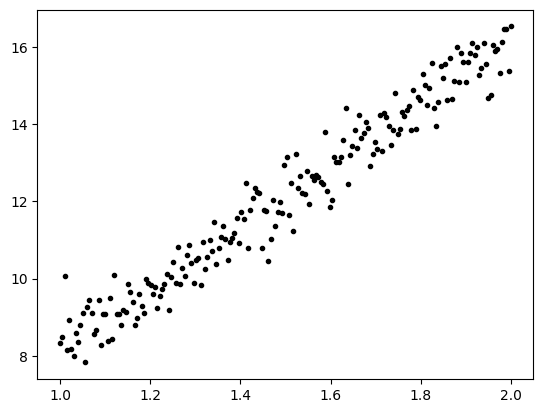

In [9]:
# Plot the data
import matplotlib.pyplot as plt
plt.plot(x, y, 'k.')
plt.show()

In [10]:
# Build model
model = models.Sequential()
model.add(layers.Dense(1, input_dim=1, activation='linear'))

In [11]:
# Get initial, untrained weights
print(model.layers[0].get_weights())

[array([[1.6828598]], dtype=float32), array([0.], dtype=float32)]


In [12]:
# Configure training process
model.compile(optimizer=optimizers.SGD(), loss='mse', metrics=['mse'])

In [13]:
# Train model
model.fit(x, y, batch_size=1, epochs=50, shuffle=False)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 3.2832 - mse: 3.2832
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3998 - mse: 0.3998
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3871 - mse: 0.3871
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3755 - mse: 0.3755
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3648 - mse: 0.3648
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3550 - mse: 0.3550
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3461 - mse: 0.3461
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3379 - mse: 0.3379
Epoch 9/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3304 - mse: 0.3304
Epoch 10/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3235 - mse: 0.3235
Epoch 11/50
200/200 [============================

In [14]:
# Try predicting 1 value
model.predict([1.1])

1/1 [==============================] - 0s 103ms/step


array([[9.151127]], dtype=float32)

7/7 [==============================] - 0s 3ms/step


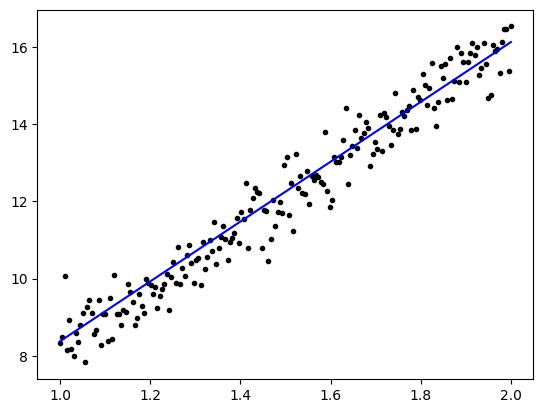

In [15]:
# Plot fitted line versus actual data
y_pred = model.predict(x)
plt.plot(x, y, 'k.', x, y_pred, 'b')
plt.show()

In [16]:
# Get trained weights
print(model.layers[0].get_weights())

[array([[7.7518477]], dtype=float32), array([0.6240944], dtype=float32)]


In [19]:
7.752*1.1+0.624

9.151200000000001

Finally, we print out the trained weights of the model with model.layers[0].get_weights(). In the example above, we can use those weights to manually calculate the y value from a given x=1.1. As you can see, it comes out to be close to the output of model.predict([1.1]).